In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

archivo_csv = "MatrizTMXV.csv"
datos = pd.read_csv(archivo_csv)

print(datos)

        ID_CIDERH REGION   FECHA_RBE  TEMP_MAX_RBE     LAT_Y      LON_X
0      M_001_A_XV     XV  1993-01-01          22.8 -18.83571 -69.745881
1      M_001_A_XV     XV  1993-01-02          23.8 -18.83571 -69.745881
2      M_001_A_XV     XV  1993-01-03          22.6 -18.83571 -69.745881
3      M_001_A_XV     XV  1993-01-04          23.0 -18.83571 -69.745881
4      M_001_A_XV     XV  1993-01-06          23.8 -18.83571 -69.745881
...           ...    ...         ...           ...       ...        ...
59201    M_201_AA     XV  2009-09-03          19.8 -18.46700 -70.167000
59202    M_201_AA     XV  2009-09-07          18.1 -18.46700 -70.167000
59203    M_201_AA     XV  2009-11-04          24.1 -18.46700 -70.167000
59204    M_201_AA     XV  2009-12-14          24.0 -18.46700 -70.167000
59205    M_202_AA     XV  2006-05-27          20.8 -18.47000 -70.170000

[59206 rows x 6 columns]


In [2]:
df_original = pd.read_csv('MatrizTMXV.csv')

df_nuevo = pd.DataFrame()

for estacion in df_original['ID_CIDERH'].unique():
    df_estacion = df_original[df_original['ID_CIDERH'] == estacion]
    
    df_nuevo[estacion] = df_estacion['TEMP_MAX_RBE'].reset_index(drop=True)

df_nuevo.to_csv('VMTMXV.csv', index=False)

archivo_csv2 = "VMTMXV.csv"
datos2 = pd.read_csv(archivo_csv2)

print(datos2)

      M_001_A_XV  M_001_B_XV  M_006_A_XV  M_007_A_XV  M_009_A_XV  M_010_A_XV  \
0           22.8        25.0         6.3        15.3        17.1        15.0   
1           23.8        24.8        11.1        15.4        18.0        15.0   
2           22.6        25.4         9.8        14.6        18.2        13.0   
3           23.0        25.4        10.2        16.0        19.5        14.2   
4           23.8        24.8         9.6        14.0        21.4        10.9   
...          ...         ...         ...         ...         ...         ...   
5921        23.0        25.8         NaN         NaN         NaN         NaN   
5922        23.8        25.6         NaN         NaN         NaN         NaN   
5923        24.2        25.5         NaN         NaN         NaN         NaN   
5924        23.2        25.1         NaN         NaN         NaN         NaN   
5925        24.0        25.2         NaN         NaN         NaN         NaN   

      M_015_A_XV  M_020_A_XV  M_028_A_X

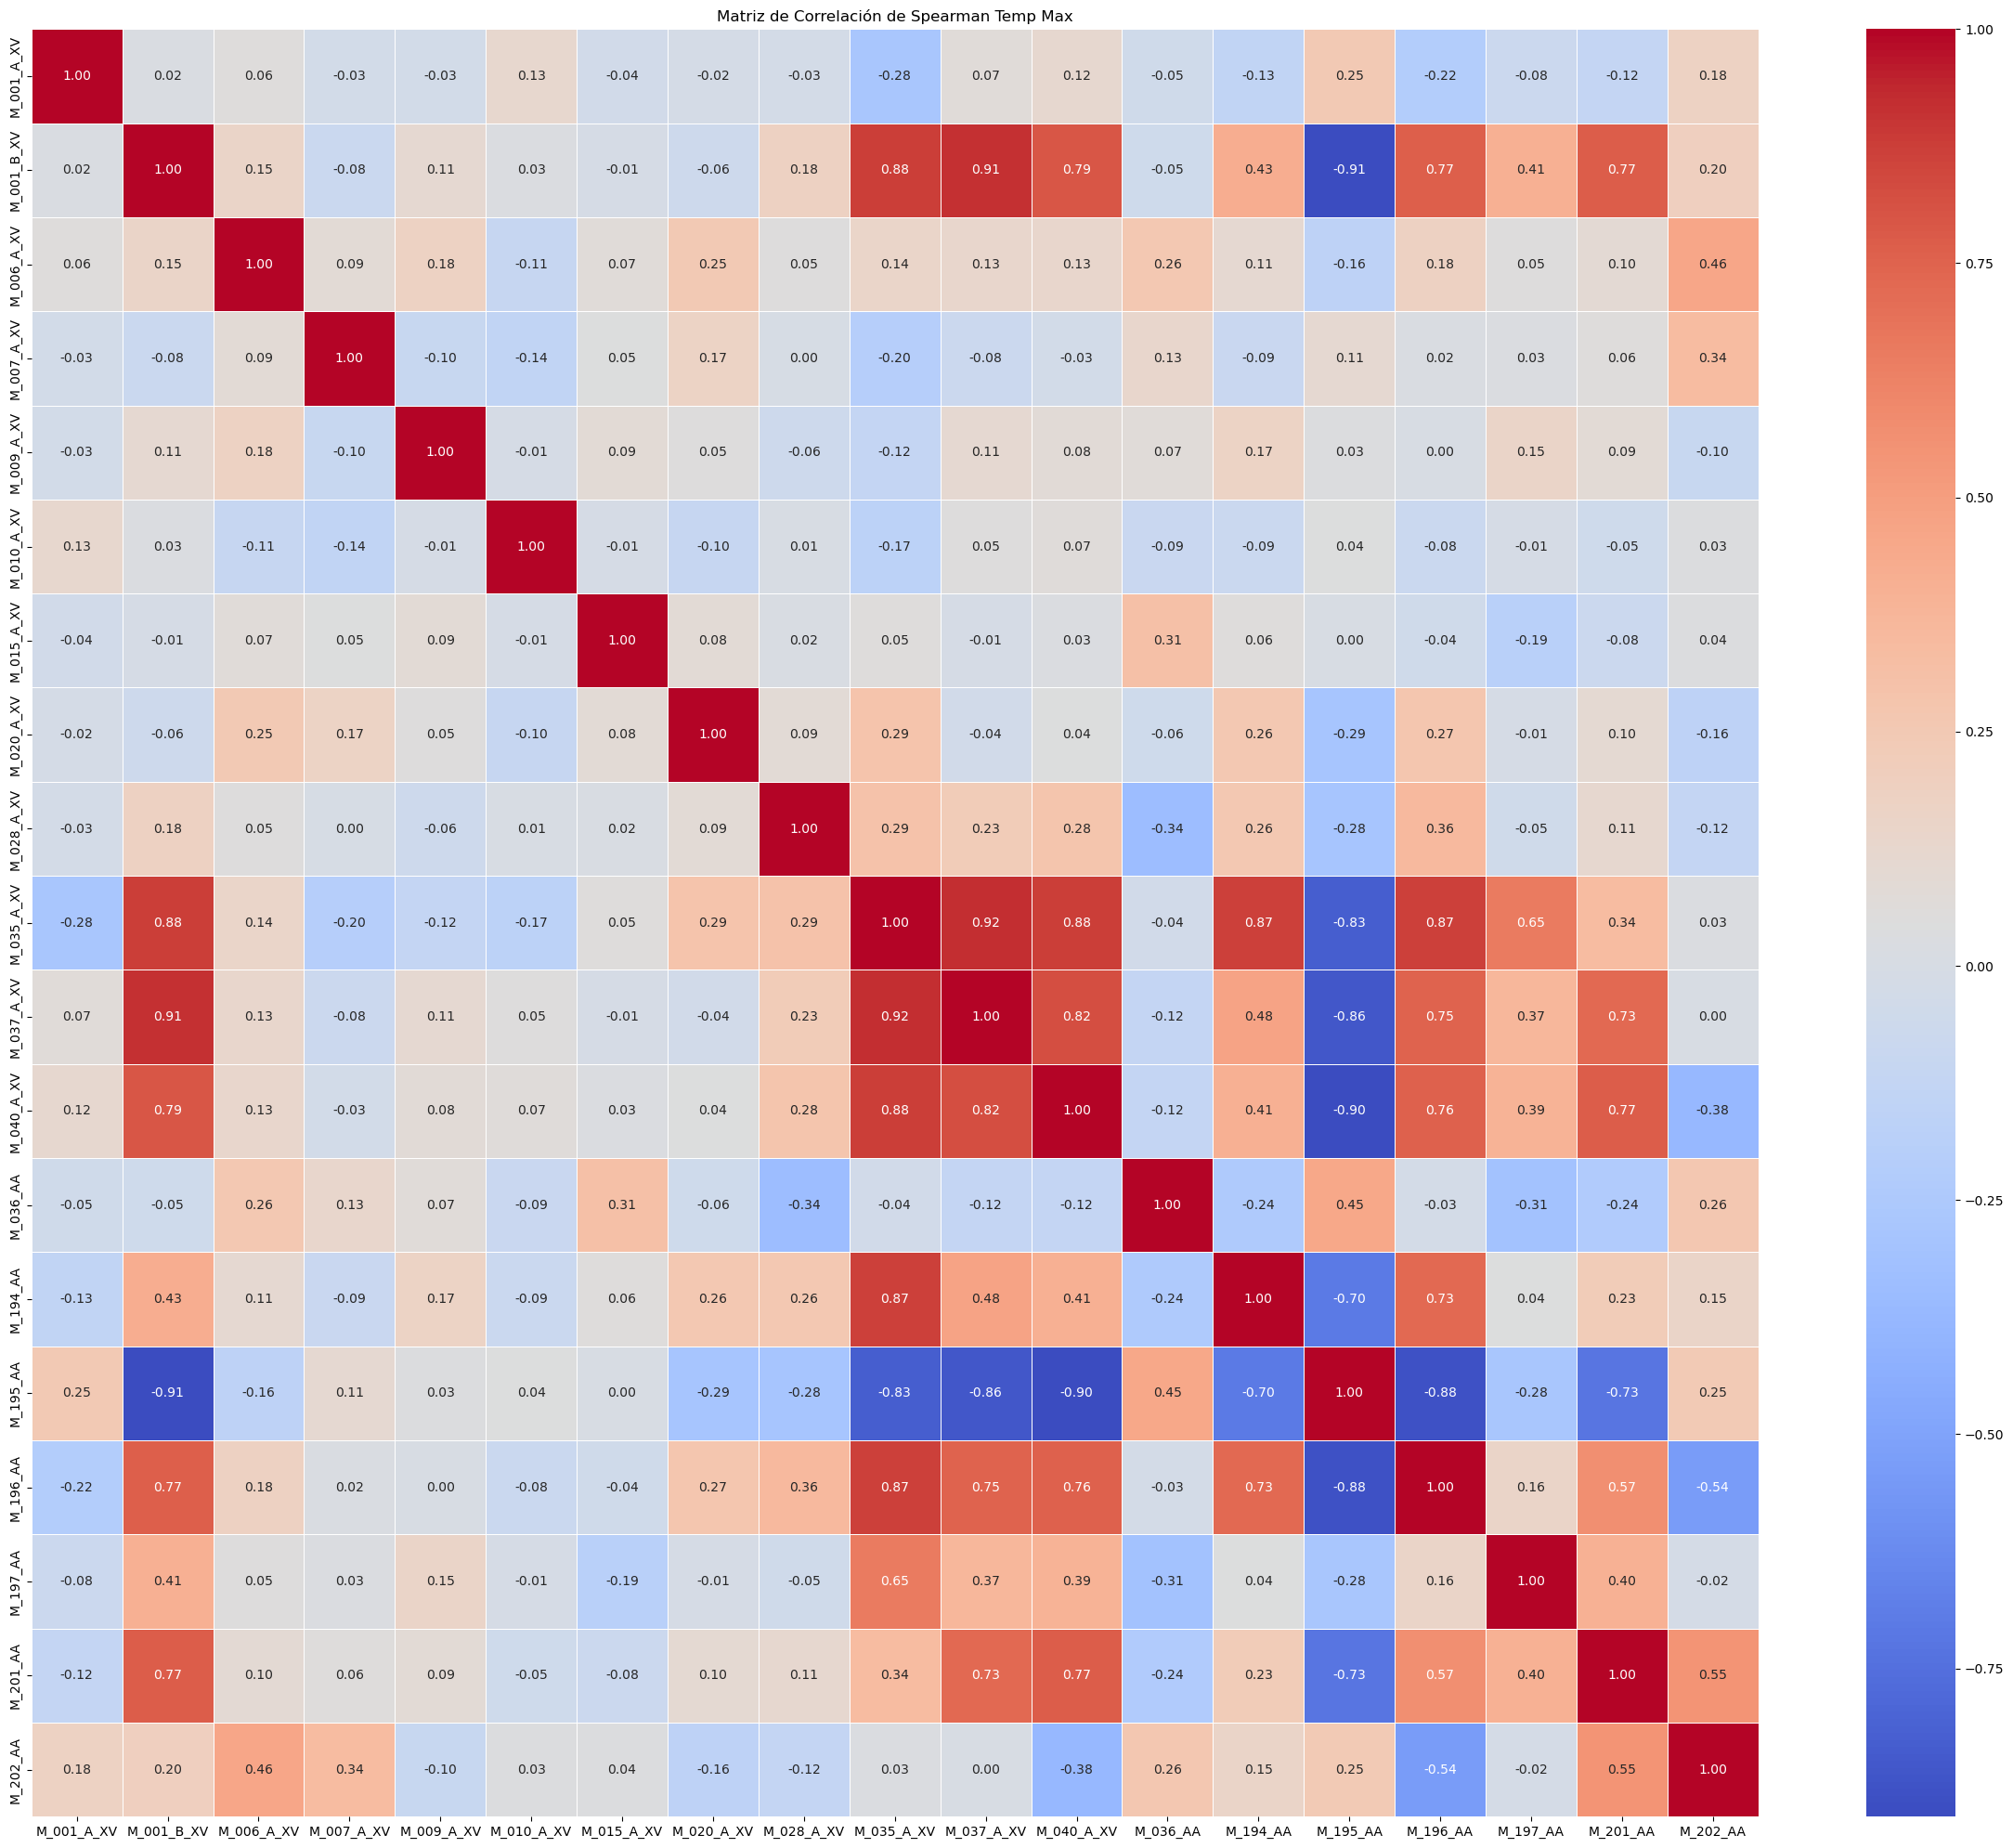

In [3]:
datos2.replace(-99.9, np.nan, inplace=True)

datos_numericos = datos2.select_dtypes(include=['float64', 'int64'])
matriz_correlacion = datos_numericos.corr(method='spearman')

plt.figure(figsize=(30, 25))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación de Spearman Temp Max")
plt.show()

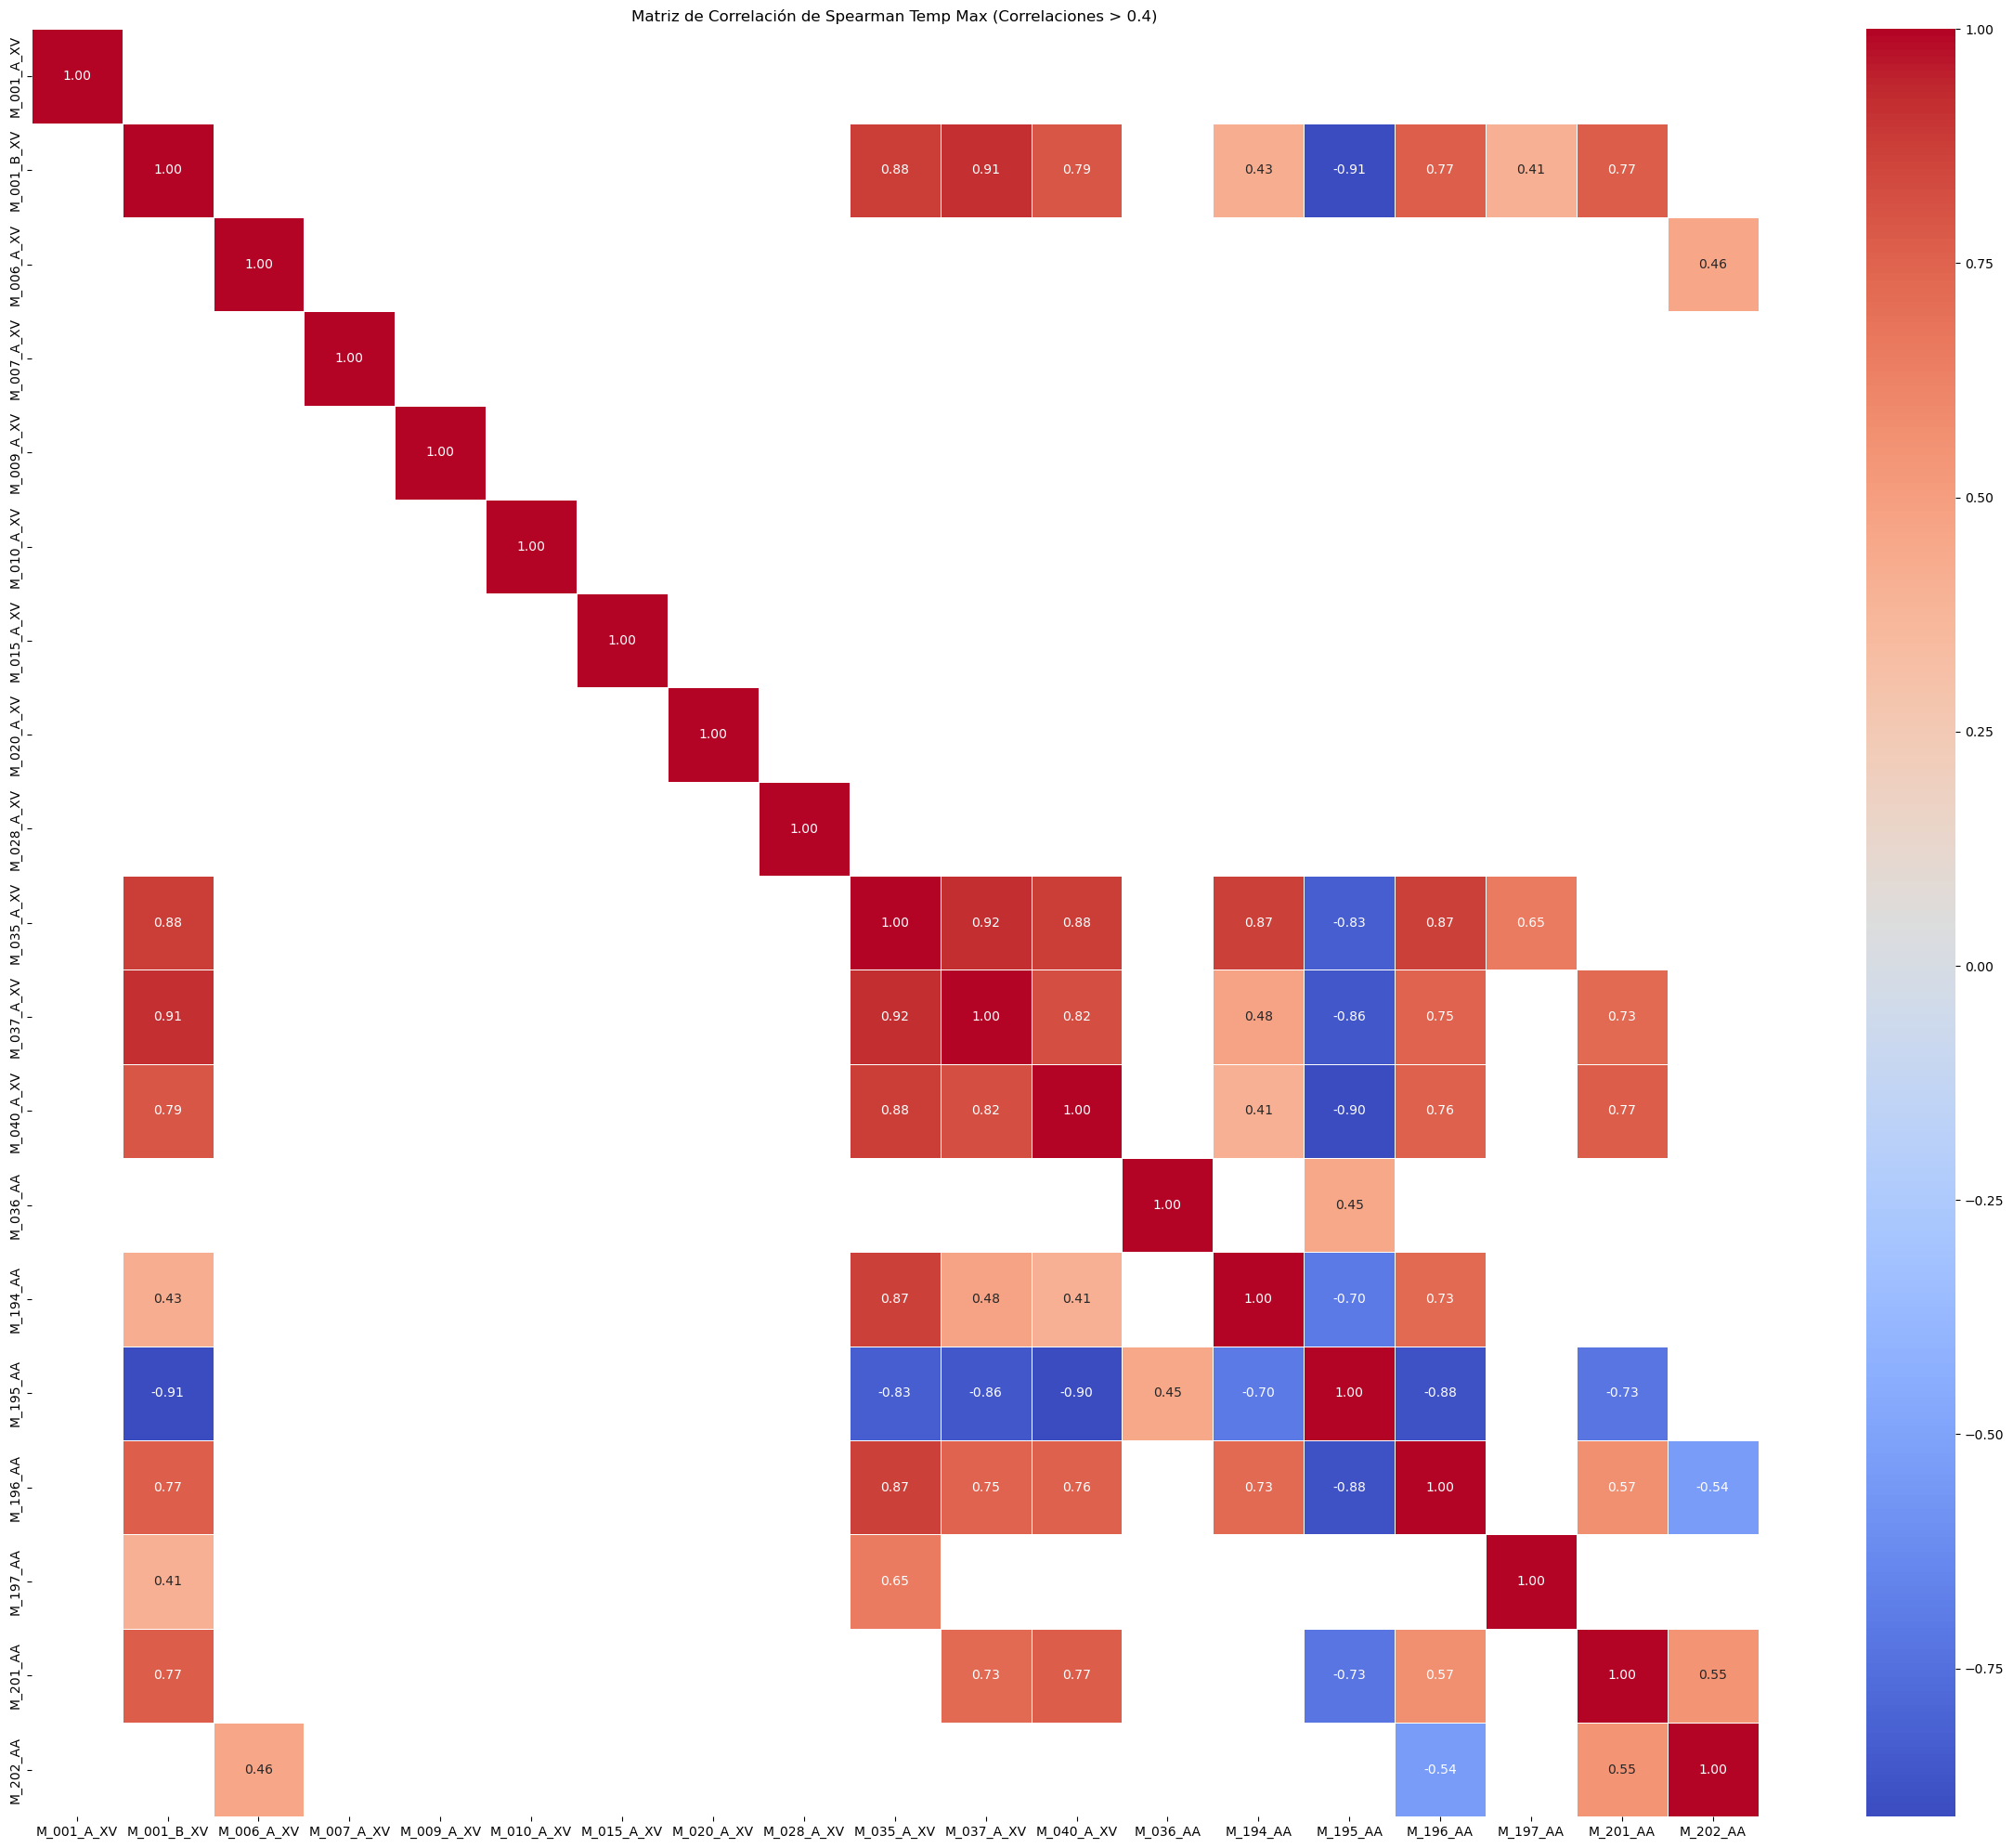

In [4]:
datos2.replace(-99.9, np.nan, inplace=True)

datos_numericos = datos2.select_dtypes(include=['float64', 'int64'])
matriz_correlacion = datos_numericos.corr(method='spearman')

# Filtrar las correlaciones mayores a 0.4
matriz_filtrada = matriz_correlacion[matriz_correlacion.abs() > 0.4]

plt.figure(figsize=(30, 25))
sns.heatmap(matriz_filtrada, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación de Spearman Temp Max (Correlaciones > 0.4)")
plt.show()

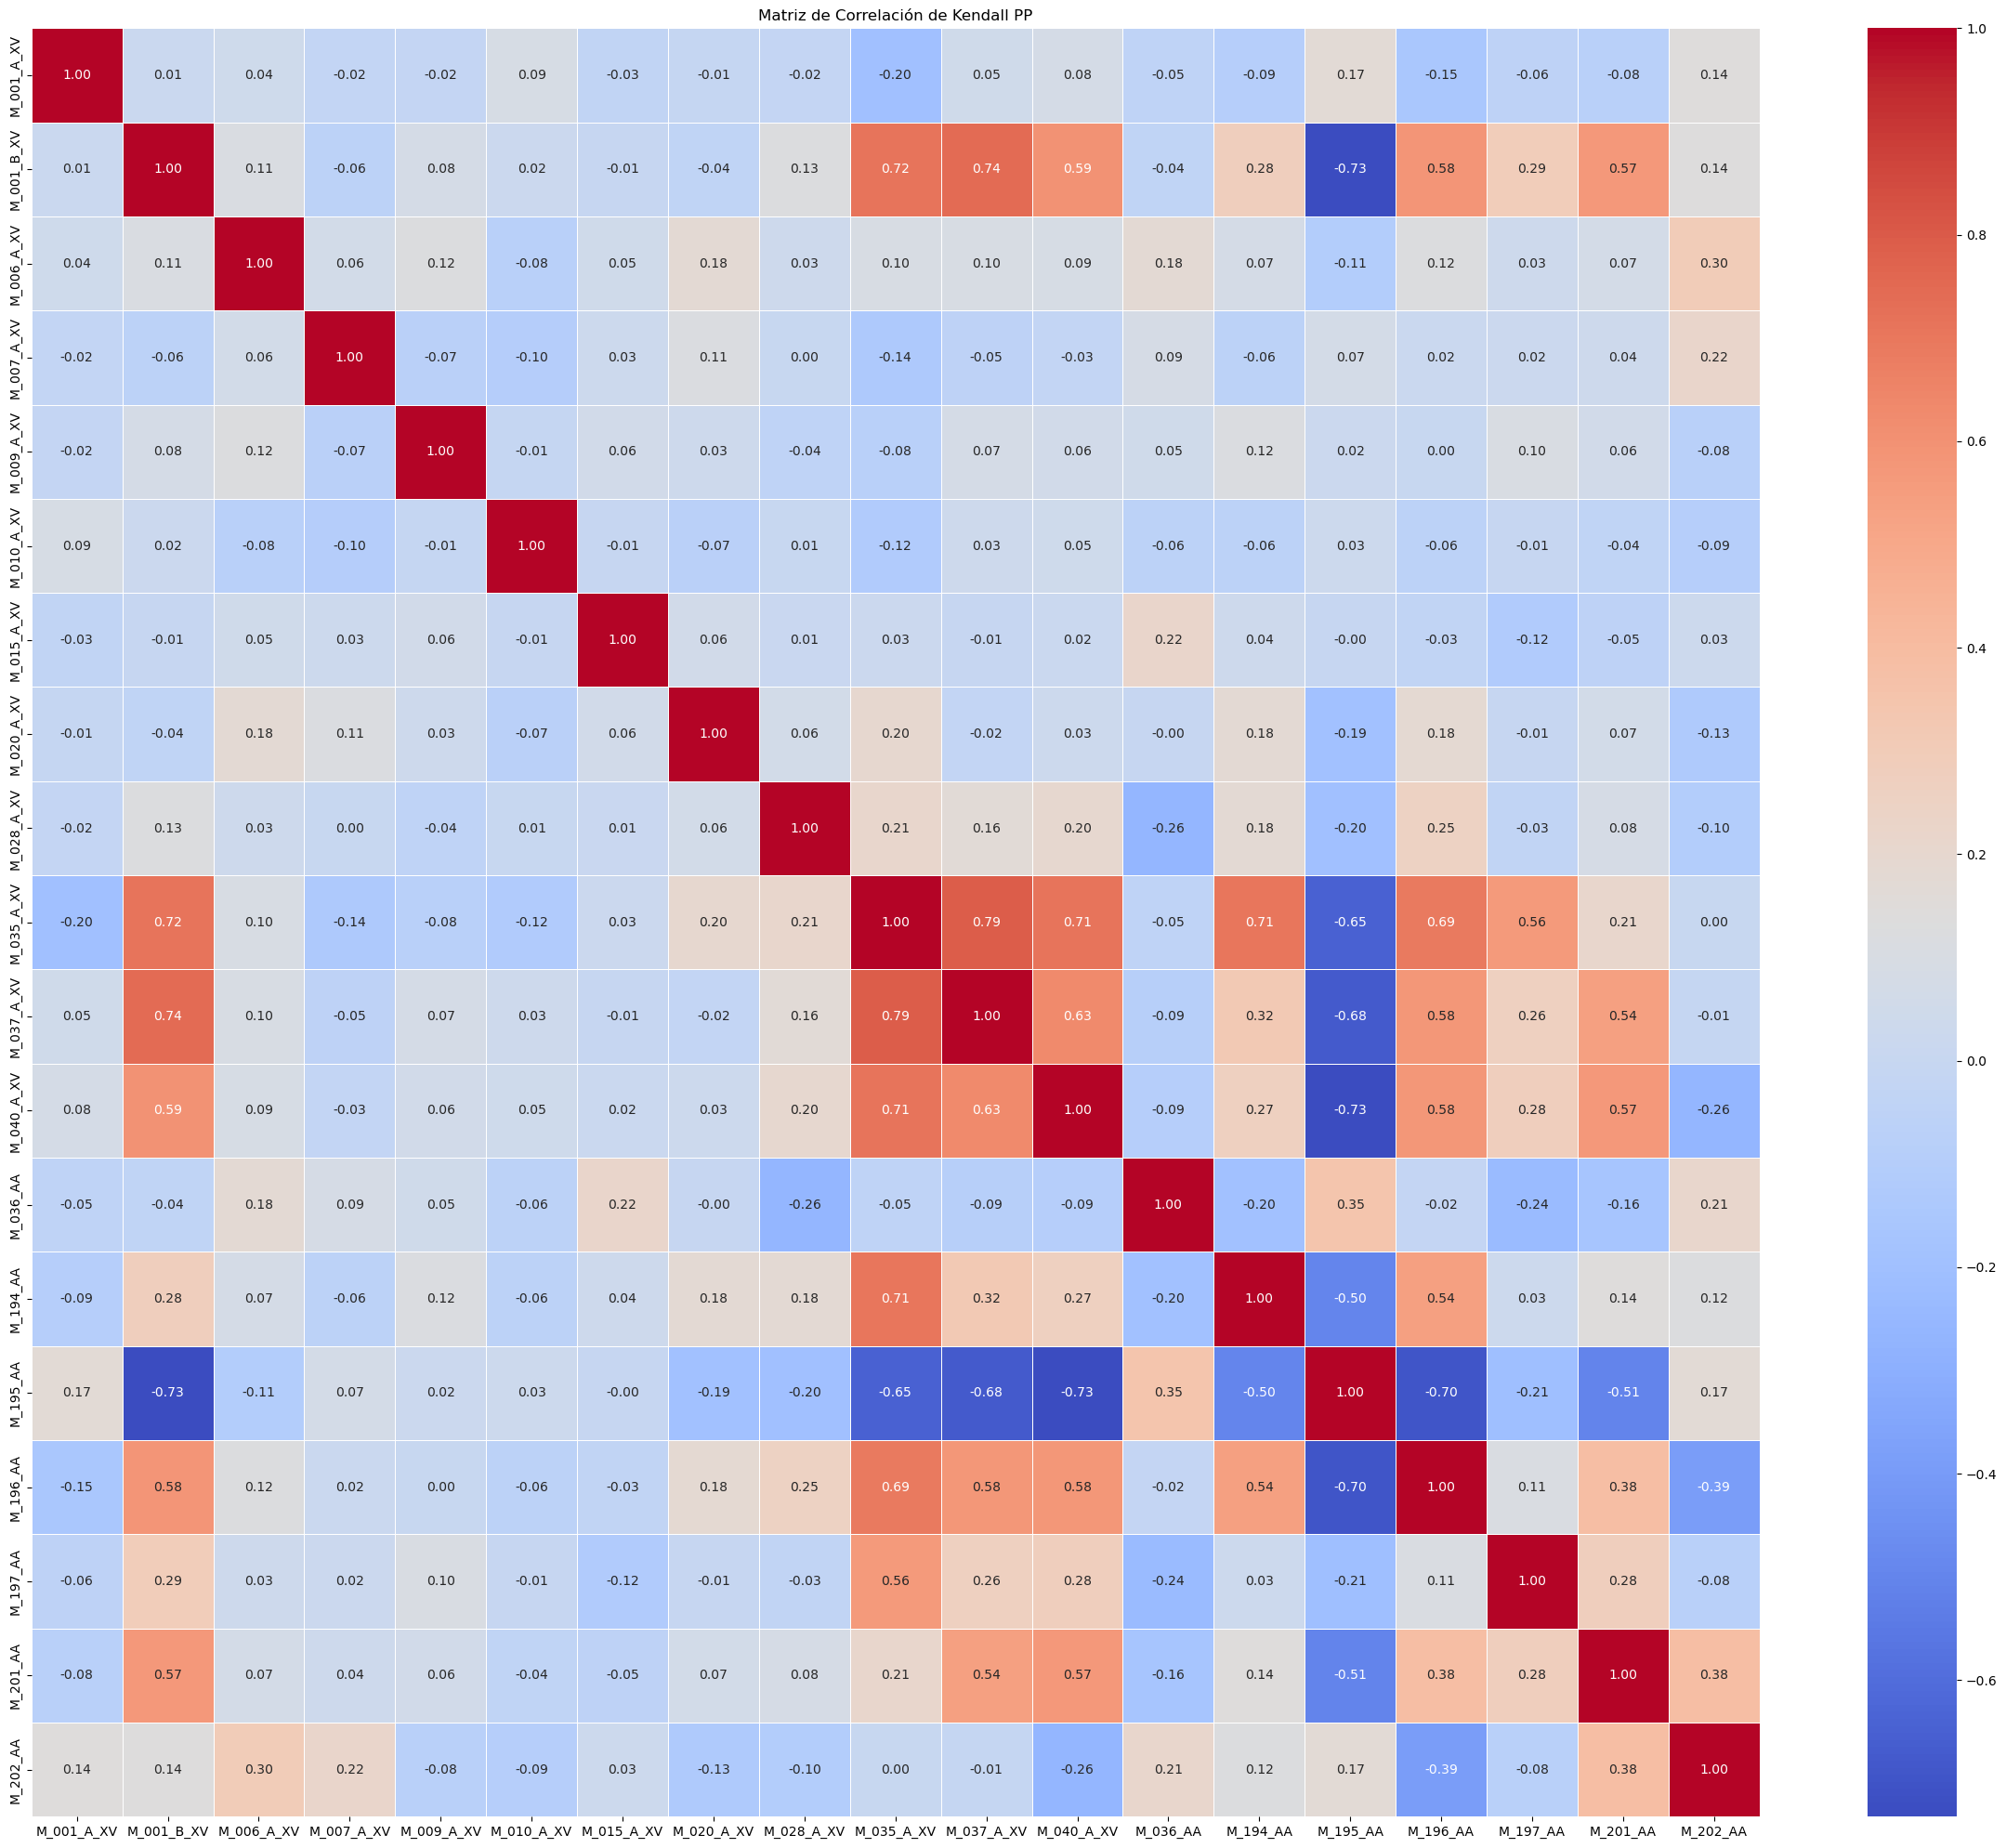

In [4]:
# Seleccionar solo las columnas numéricas
datos_numericos = datos2.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación de Kendall
matriz_correlacion_kendall = datos_numericos.corr(method='kendall')

# Crear el heatmap
plt.figure(figsize=(30, 25))
sns.heatmap(matriz_correlacion_kendall, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación de Kendall PP")
plt.show()

In [1]:
import folium
import pandas as pd

# Lee el archivo CSV con las latitudes y longitudes
data = pd.read_csv('MatrizTMXV.csv', encoding='latin-1', low_memory=False)

# Crea un mapa centrado en una ubicación inicial
mapa = folium.Map(location=[data['LAT_Y'].mean(), data['LON_X'].mean()], zoom_start=10)

# Utiliza un conjunto para realizar un seguimiento de las estaciones ya agregadas
estaciones_agregadas = set()

# Añade marcadores para cada estación meteorológica usando 'ID_CIDERH'
for index, row in data.iterrows():
    # Verifica si la estación ya ha sido agregada
    if row['ID_CIDERH'] not in estaciones_agregadas:
        popup_text = f"ID_CIDERH: {row['ID_CIDERH']}"
        # Añade el marcador con el nombre de la estación
        folium.Marker([row['LAT_Y'], row['LON_X']], popup=popup_text).add_to(mapa)
        # Agrega la estación al conjunto
        estaciones_agregadas.add(row['ID_CIDERH'])

# Guarda el mapa como un archivo HTML
mapa.save('Mapa_Estaciones_XV.html')